# **RNN**


**1.  data preprocessing**

**2.  Building RNN**

**3.  predictions and visualising**



# **DATA PREPROCESSING**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
'''
train_data = data_train[['Date','Open']]
print(train_data.head())
'''
training_set = dataset_train.iloc[:,1:2].values
print(training_set)

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]


**Feature scaling**

In [2]:
#we are normalising data
from sklearn.preprocessing import MinMaxScaler
#(0,1) is used beacuse data after being normalised falls in this range
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)
print(training_set_scaled)

[[0.08581368]
 [0.09701243]
 [0.09433366]
 ...
 [0.95725128]
 [0.93796041]
 [0.93688146]]


In [3]:
#create data structure with 60 timesteps and one ouput
#60 previous info of nodes given to node which we are going to predict
#xtrain = yt-i
#yti
#ytrain  = yt+i
x_train = []
y_train = []
for i in range(60,1258):
  x_train.append(training_set_scaled[i-60:i,0])
  y_train.append(training_set_scaled[i,0])
x_train,y_train = np.array(x_train),np.array(y_train)
print(x_train)
print(y_train)

 

[[0.08581368 0.09701243 0.09433366 ... 0.07846566 0.08034452 0.08497656]
 [0.09701243 0.09433366 0.09156187 ... 0.08034452 0.08497656 0.08627874]
 [0.09433366 0.09156187 0.07984225 ... 0.08497656 0.08627874 0.08471612]
 ...
 [0.92106928 0.92438053 0.93048218 ... 0.95475854 0.95204256 0.95163331]
 [0.92438053 0.93048218 0.9299055  ... 0.95204256 0.95163331 0.95725128]
 [0.93048218 0.9299055  0.93113327 ... 0.95163331 0.95725128 0.93796041]]
[0.08627874 0.08471612 0.07454052 ... 0.95725128 0.93796041 0.93688146]


**reshaping**

adding new indicators 

In [0]:
#x_train.shape[0] i.e rows
#x_train.shape[1] i.e columns
#no. of indicators = 1(i.e 'open' in dataset)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [5]:
x_train.shape

(1198, 60, 1)

# BUILDING RNN

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


Using TensorFlow backend.


In [7]:
#initialising rnn
regressor  = Sequential()

W0801 09:09:21.860851 140509609596800 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [8]:
#adding first lstm layer and dropout regularisation
#units lstm memory cells or neurons
#return_sequence = true
#0.2 = 20% of neurons to be drop in lstm during forward and backward propogation
regressor.add(LSTM(units = 50 , return_sequences = True, input_shape=(x_train.shape[1],1)))
regressor.add(Dropout(0.2))

W0801 09:09:23.949023 140509609596800 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0801 09:09:23.960687 140509609596800 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0801 09:09:24.212300 140509609596800 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0801 09:09:24.224810 140509609596800 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Ins

In [0]:
#2 lstm layer
regressor.add(LSTM(units = 50 , return_sequences = True))
regressor.add(Dropout(0.2))

In [0]:
#3 lstm layer
regressor.add(LSTM(units = 50 , return_sequences = True))
regressor.add(Dropout(0.2))

In [0]:
#4 and last lstm layer
#False no return of sequences
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [0]:
#adding output layer
regressor.add(Dense(units = 1))

In [13]:
#compiling RNN
regressor.compile(optimizer='adam',loss = 'mean_squared_error')

W0801 09:09:36.647302 140509609596800 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [14]:
#fitting and predicting
regressor.fit(x_train,y_train,epochs = 100,batch_size = 32)


W0801 09:09:39.019135 140509609596800 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0801 09:09:41.494580 140509609596800 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0603
Epoch 2/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0069
Epoch 3/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0054
Epoch 4/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0051
Epoch 5/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0046
Epoch 6/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0045
Epoch 7/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0052
Epoch 8/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0050
Epoch 9/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0041
Epoch 10/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0040
Epoch 11/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0043
Epoch 12/100
1198/1198 [==============================] - 6s 5ms/step - lo

In [16]:
#get real stock prices of google 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')

real_stock_price = dataset_test.iloc[:,1:2].values
print(real_stock_price)

[[778.81]
 [788.36]
 [786.08]
 [795.26]
 [806.4 ]
 [807.86]
 [805.  ]
 [807.14]
 [807.48]
 [807.08]
 [805.81]
 [805.12]
 [806.91]
 [807.25]
 [822.3 ]
 [829.62]
 [837.81]
 [834.71]
 [814.66]
 [796.86]]


In [17]:
#predicted stock price
dataset_total  = pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)

print(len(dataset_total))
print(len(dataset_test))
inputs = dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
x_test = []
for i in range(60,80):
  x_test.append(inputs[i-60:i,0])
x_test= np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
predicted_stock_price=regressor.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
1278-20

1278
20


1258

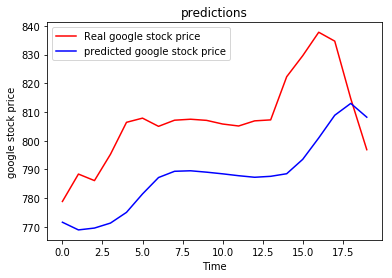

20


In [18]:
 #visualising
plt.plot(real_stock_price,color ='red',label = 'Real google stock price')
plt.plot(predicted_stock_price,color ='blue',label = 'predicted google stock price')
plt.title('predictions')
plt.xlabel('Time')
plt.ylabel('google stock price')
plt.legend()
plt.show()
print(len(real_stock_price-predicted_stock_price))

 **in RNN it is not that your predicted value should be close to the original values but on graph the path it made should be some what similarthough if want to calculate error yiu can use RMSE** 

In [0]:
#in RNN it is not that your predicted value should be close to the original values but on graph the path it made should be some what similar
#though if want to calculate error yiu can use RMSE
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))


**for improving model**
**1 .train on large amount of past data**

**2. increase time steps here 60 u could use 120**

**3. you could also use new features like stock price of other dependent company**

**4. use more LSTM layers**

 **5.  more memory cells or neurons in LSTM**